In [1]:
from headers import *
import sklearn.manifold as skl_manifold
plt.rcParams['figure.figsize'] = 14, 10

In [34]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/"
num_images = npy.load(os.path.join(FILE_DIR,"Number_Images.npy"))

In [35]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/D{0}"

lhseg = [[] for i in range(10)]
rhseg = [[] for i in range(10)]

lhlabel = [[] for i in range(10)]
rhlabel = [[] for i in range(10)]

for i in range(10):
#     lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_LH_Seg_Indices.npy".format(i+1)))
#     rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_RH_Seg_Indices.npy".format(i+1)))
    lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Seg.npy"))
    rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Seg.npy"))
    
    lhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Label.npy"))
    rhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Label.npy"))

action_list = npy.array(['Null','Reach','Place','Return','Pour'])

In [36]:
hc3 = [[] for i in range(10)]
lh = [[] for i in range(10)]
rh = [[] for i in range(10)]
# lhs = [[] for i in range(10)]
# rhs = [[] for i in range(10)]

for i in range(10):
    hc3[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"Hand_Coordinates_3D.npy"))
    lh[i] = hc3[i][:,0,:]
    rh[i] = hc3[i][:,2,:]

In [37]:
numlhseg = 0
numrhseg = 0
for i in range(10):
    numlhseg += len(lhseg[i])-1
    numrhseg += len(rhseg[i])-1
numlhseg,numrhseg

(64, 63)

In [38]:
lhpos = [[] for i in range(numlhseg)]
rhpos = [[] for i in range(numrhseg)]

lhlabel_list = [[] for i in range(numlhseg)]
rhlabel_list = [[] for i in range(numrhseg)]

ctr = 0
for i in range(10):
    for j in range(len(lhseg[i])-1):
        lhpos[ctr] = lh[i][lhseg[i][j]:lhseg[i][j+1]]
        lhlabel_list[ctr] = lhlabel[i][j]
        ctr +=1
ctr = 0
for i in range(10):
    for j in range(len(rhseg[i])-1):
        rhpos[ctr] = rh[i][rhseg[i][j]:rhseg[i][j+1]]
        rhlabel_list[ctr] = rhlabel[i][j]
        ctr +=1 
        

In [39]:
rolltime = 100
nk = 50
kbw = 5
lhdmp = [DMP(rolltime, nk, kbw) for i in range(numlhseg)]
rhdmp = [DMP(rolltime, nk, kbw) for i in range(numrhseg)]

for i in range(numlhseg):
    lhdmp[i].linear_interpolate(lhpos[i])
    lhdmp[i].initialize_variables()
    lhdmp[i].learn_DMP()

for i in range(numrhseg):
    rhdmp[i].linear_interpolate(rhpos[i])
    rhdmp[i].initialize_variables()
    rhdmp[i].learn_DMP()


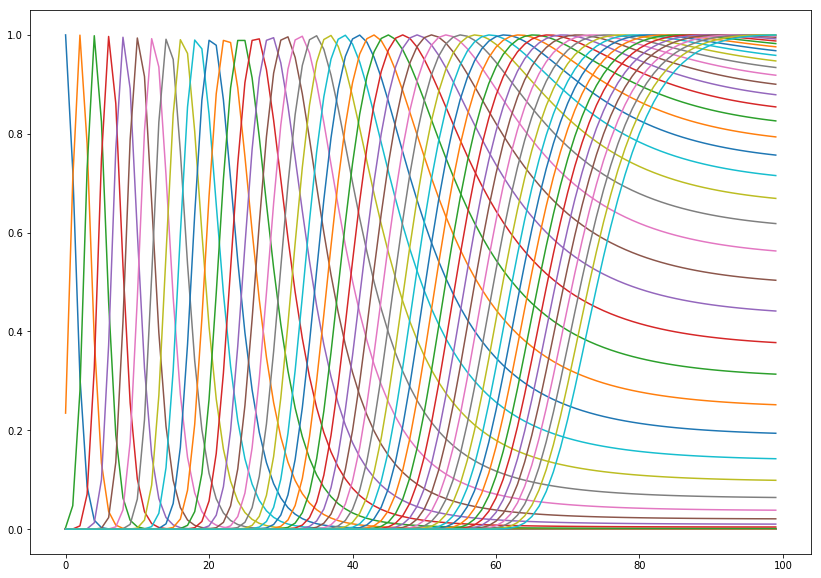

In [40]:
fig,ax = plt.subplots()
b = npy.zeros((lhdmp[0].number_kernels,lhdmp[0].time_steps))
for i in range(lhdmp[0].number_kernels):
    for t in range(lhdmp[0].time_steps):
        b[i,t]=lhdmp[0].basis(i,t)        
    ax.plot(range(lhdmp[0].time_steps),b[i])    

plt.show()

In [41]:
i=0
tr = npy.linspace(0,lhdmp[0].time_steps,lhdmp[0].number_kernels)
# print(lhdmp[0].number_kernels,lhdmp[0].time_steps)
vector_phase = lhdmp[i].calc_vector_phase(tr)
# plt.plot(tr,vector_phase)
# plt.show()


In [42]:
nk = lhdmp[0].number_kernels
lhmetaw = npy.zeros((numlhseg,nk,3))
rhmetaw = npy.zeros((numrhseg,nk,3))

for i in range(numlhseg):
    lhmetaw[i] = lhdmp[i].weights
for i in range(numrhseg):
    rhmetaw[i] = rhdmp[i].weights


In [43]:
lh_pnw = npy.zeros((numlhseg,nk,3))
rh_pnw = npy.zeros((numrhseg,nk,3))

for i in range(numlhseg):
    for j in range(lhdmp[i].number_kernels):
        lh_pnw[i,j] = lhdmp[i].weights[j]*vector_phase[j]
for i in range(numrhseg):
    for j in range(lhdmp[i].number_kernels):
        rh_pnw[i,j] = rhdmp[i].weights[j]*vector_phase[j]

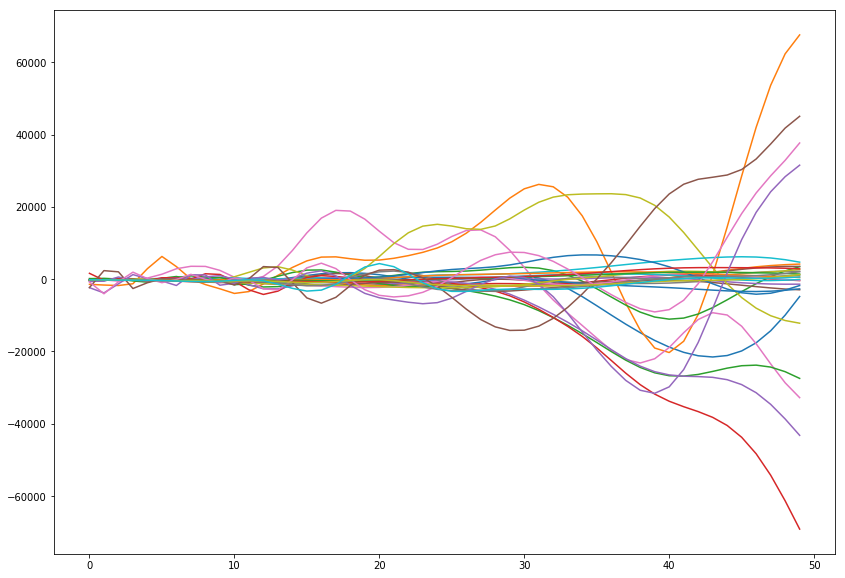

In [44]:
for i in range(10):
    plt.plot(range(lhdmp[i].number_kernels),lhmetaw[i])
#     plt.plot(range(lhdmp[i].number_kernels),lh_pnw[i])
plt.show()

In [45]:
lhnotnan = []
rhnotnan = []
 
for i in range(numlhseg):
    if not(npy.isnan(lhmetaw[i]).any()):
        lhnotnan.append(i)
    
for i in range(numrhseg):
    if not(npy.isnan(rhmetaw[i]).any()):
        rhnotnan.append(i)

In [46]:
lhmetaw = lhmetaw.reshape(numlhseg,3*nk)
rhmetaw = rhmetaw.reshape(numrhseg,3*nk)

lh_pnw = lh_pnw.reshape(numlhseg,3*nk)
rh_pnw = rh_pnw.reshape(numrhseg,3*nk)
len(lhnotnan),len(rhnotnan),lhmetaw.shape, rhmetaw.shape,len(lhlabel_list)

(63, 63, (64, 150), (63, 150), 64)

In [47]:
lhlabel_list = npy.array(lhlabel_list)
rhlabel_list = npy.array(rhlabel_list)

In [48]:
lhmetaw = lhmetaw[lhnotnan]
lh_pnw = lh_pnw[lhnotnan]
lhlabel_list = lhlabel_list[lhnotnan]

# rhmetaw = rhmetaw[rhnotnan]
len(lhlabel_list)

63

In [49]:
npy.where(lhlabel_list), len(npy.where(lhlabel_list)[0])

((array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22,
         23, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 41, 42, 43, 44,
         45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62]),), 48)

In [50]:
lhmetaw = lhmetaw[npy.where(lhlabel_list)[0]]
rhmetaw = rhmetaw[npy.where(rhlabel_list)[0]]
lh_pnw = lh_pnw[npy.where(lhlabel_list)[0]]
rh_pnw = rh_pnw[npy.where(rhlabel_list)[0]]

In [51]:
lhmetaw.shape, rhmetaw.shape, lh_pnw.shape, rh_pnw.shape

((48, 150), (42, 150), (48, 150), (42, 150))

In [52]:
# CLUSTERING WITH UNNORMALIZED WEIGHTS FOR LEFT HAND, THEN EMBEDDING. 
num_cluster = 10

lhkmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(lhmetaw)
lhmodel = skl_manifold.TSNE(n_components=2,random_state=0)
lhew = lhmodel.fit_transform(lhmetaw)
lhkmeans.labels_

array([5, 0, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 9, 5, 2,
       5, 5, 3, 5, 5, 7, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 0, 5, 5, 4, 5, 5,
       5, 5], dtype=int32)

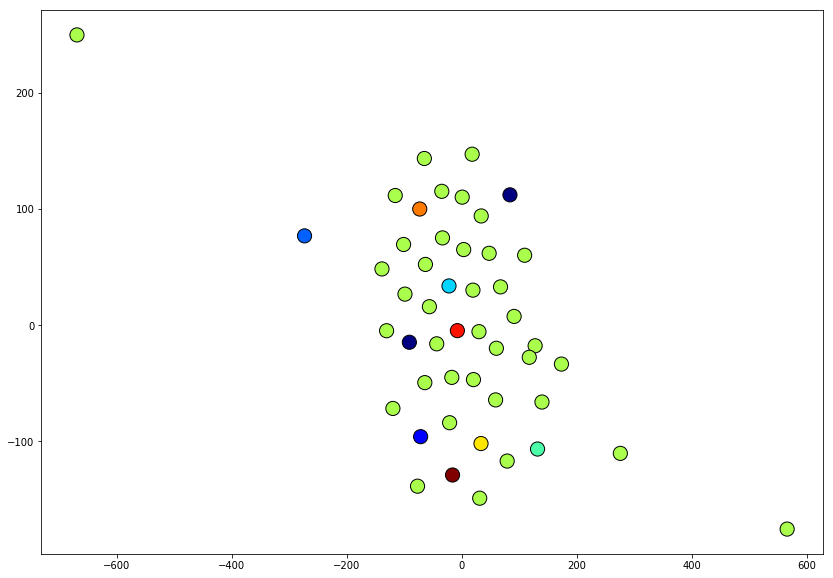

In [53]:
fig,ax = plt.subplots()
ax.scatter(lhew[:,0],lhew[:,1],c=lhkmeans.labels_,s=200,cmap='jet',edgecolor='k')
plt.show()

In [54]:
# Clustering with unnormalized RH weights then embedding. 
num_cluster = 10

rhkmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(rhmetaw)
rhmodel = skl_manifold.TSNE(n_components=2,random_state=0)
rhew = rhmodel.fit_transform(rhmetaw)
rhkmeans.labels_

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 6, 9, 9, 4, 9, 0, 1,
       9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 5, 9, 9, 3, 9, 9, 2, 9], dtype=int32)

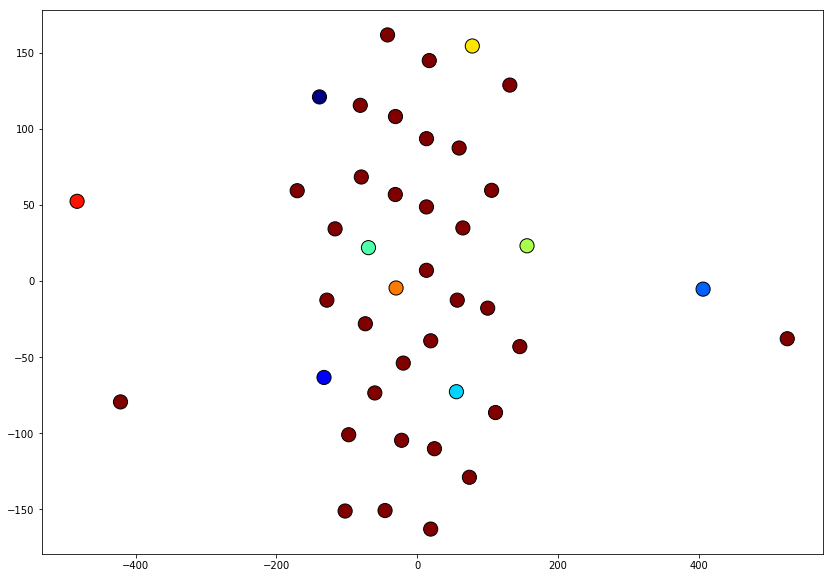

In [55]:
fig,ax = plt.subplots()
ax.scatter(rhew[:,0],rhew[:,1],c=rhkmeans.labels_,s=200,cmap='jet',edgecolor='k')
plt.show()

In [56]:
# Clustering with phase normalized RH weights then embedding. 
num_cluster = 10

pnwrhkmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(rh_pnw)
pnwrhmodel = skl_manifold.TSNE(n_components=2,random_state=0)
pnwrhew = pnwrhmodel.fit_transform(rh_pnw)
pnwrhkmeans.labels_

array([0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 8, 6, 0, 0, 0, 0, 8, 1,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 2, 0], dtype=int32)

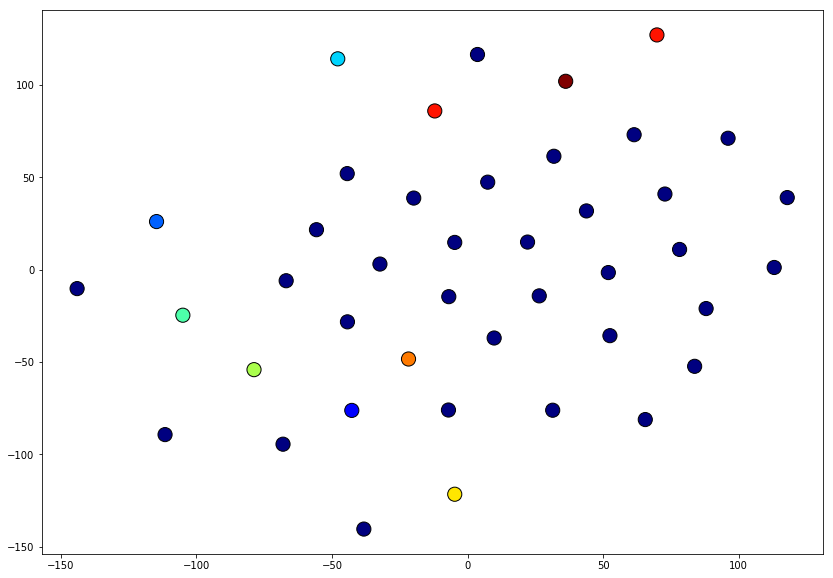

In [57]:
fig,ax = plt.subplots()
ax.scatter(pnwrhew[:,0],pnwrhew[:,1],c=pnwrhkmeans.labels_,s=200,cmap='jet',edgecolor='k')
plt.show()

In [58]:
# Clustering with phase normalized RH weights then embedding. 
num_cluster = 10

pnwrhkmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(rh_pnw/rh_pnw.max())
pnwrhmodel = skl_manifold.TSNE(n_components=2,random_state=0)
pnwrhew = pnwrhmodel.fit_transform(rh_pnw/rh_pnw.max())
pnwrhkmeans.labels_

array([0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 8, 6, 0, 0, 0, 0, 8, 1,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 2, 0], dtype=int32)

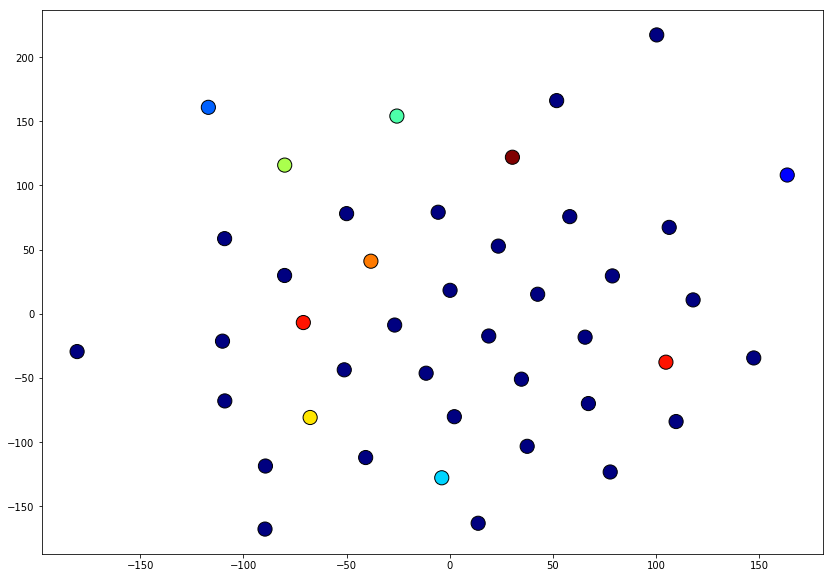

In [59]:
fig,ax = plt.subplots()
ax.scatter(pnwrhew[:,0],pnwrhew[:,1],c=pnwrhkmeans.labels_,s=200,cmap='jet',edgecolor='k')
plt.show()

In [33]:
nonan_lhlabel = [[] for i in range(len(lhnotnan))]
for i in range(len(lhnotnan)):
    nonan_lhlabel[i] = lhlabel_list[lhnotnan[i]]

IndexError: index 63 is out of bounds for axis 0 with size 63

In [34]:
fig,ax = plt.subplots()
ax.scatter(rhew[:,0],rhew[:,1],c=nonan_lhlabel,s=100)
plt.show()

ValueError: Invalid RGBA argument: 0

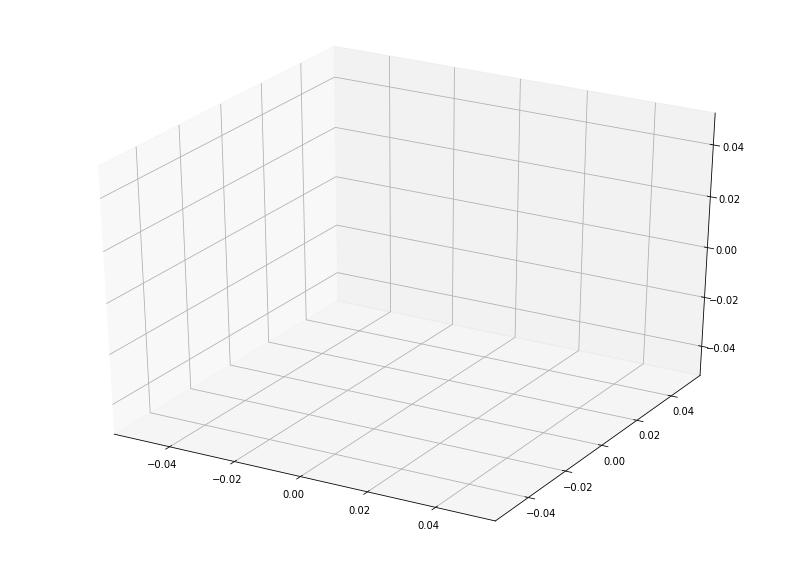

In [39]:
consider_lab = 1
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
for i in range(numlhseg-1):
    if nonan_lhlabel[i]==consider_lab:
#         ax1.plot(lhpos[lhnotnan[i]][:,0],lhpos[lhnotnan[i]][:,1],lhpos[lhnotnan[i]][:,2])
        
        
        ax1.plot(lhdmp[lhnotnan[i]].pos_roll[:,0],lhdmp[lhnotnan[i]].pos_roll[:,1],lhdmp[lhnotnan[i]].pos_roll[:,2])
#         ax1.plot(lhdmp[])
#         ax1.plot(lhpos[nonan_lhlabel[i]][:,0],lhpos[nonan_lhlabel[i]][:,1],lhpos[nonan_lhlabel[i]][:,2])
        
plt.show()